In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('netflix_titles.csv')
# print(df.head())

In [2]:
# Filter out all the movies
movies = df[df.type == 'Movie']

# remove columns
movies = movies[['title','release_year','duration', 'listed_in']]
# print(movies)

# get the duration in number format
split_duration = movies.duration.str.split('(\d+)', expand=True)
movies.duration = split_duration[1]
movies['duration'] = pd.to_numeric(movies.duration)
# movies = movies.dropna()

movie_durations = movies.groupby('release_year').duration.mean().reset_index()
movie_durations.columns = ['release_year', 'average_duration']
# print(movie_durations)

In [3]:
# print(movies.head)

# Split listed_in into individual strings and convert them into lists
listed_in = movies.listed_in.str.split(', ', expand=True)
list_of_genres_0 = listed_in[0].to_list()
list_of_genres_1 = listed_in[1].to_list()
list_of_genres_2 = listed_in[2].to_list()

# combine all genre lists and remove all the duplicated genres to generate list of unique genres
list_of_genres = list_of_genres_0 + list_of_genres_1 + list_of_genres_2
unique_genres = [] 
for i in list_of_genres: 
    if i not in unique_genres: 
        unique_genres.append(i) 
print(unique_genres)
print(len(unique_genres))

['Children & Family Movies', 'Stand-Up Comedy', 'Comedies', 'International Movies', 'Action & Adventure', 'Cult Movies', 'Documentaries', 'Horror Movies', 'Dramas', 'Anime Features', 'Independent Movies', 'Movies', 'Thrillers', 'Classic Movies', 'Music & Musicals', 'Sci-Fi & Fantasy', 'Sports Movies', 'Romantic Movies', None, 'LGBTQ Movies', 'Faith & Spirituality']
21


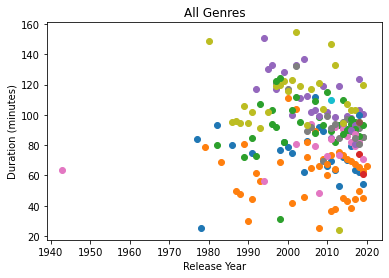

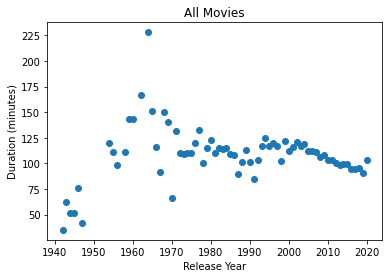

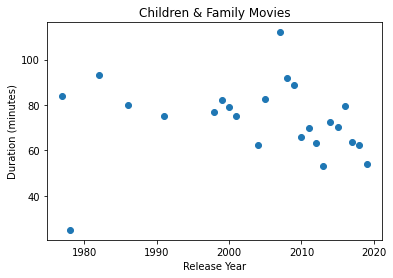

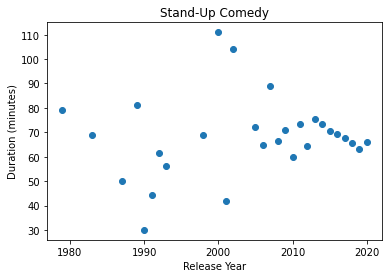

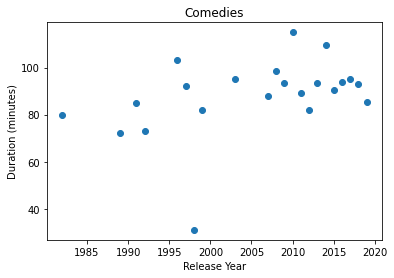

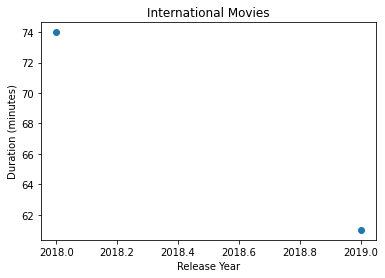

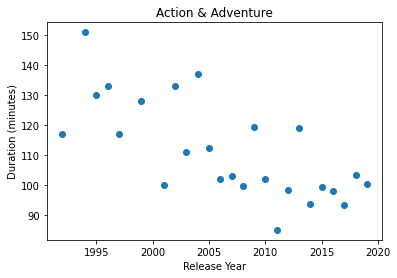

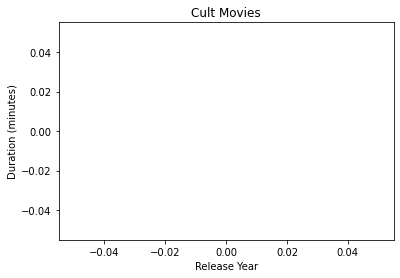

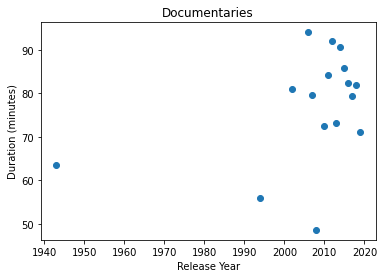

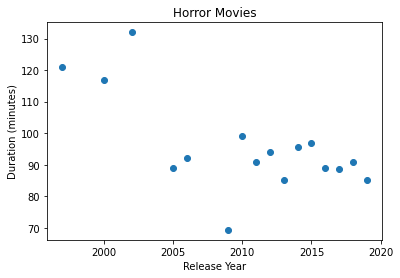

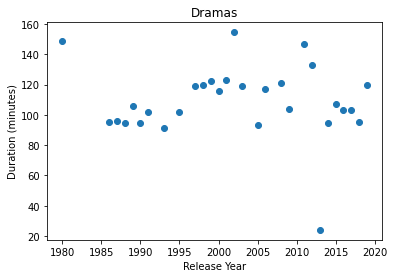

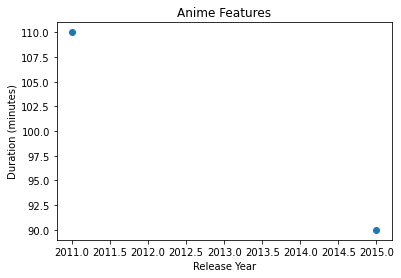

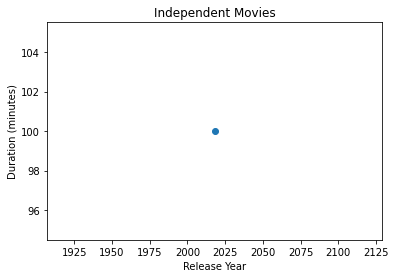

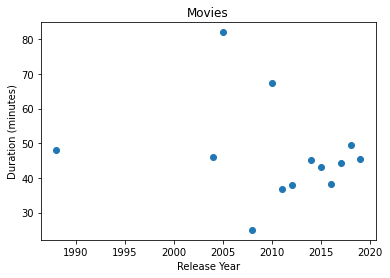

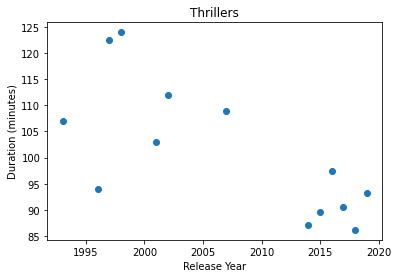

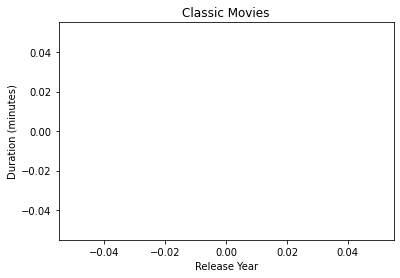

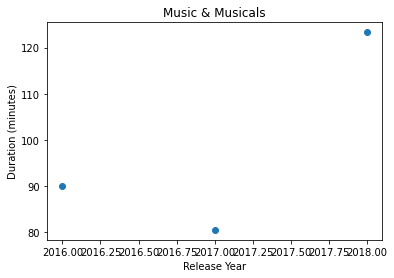

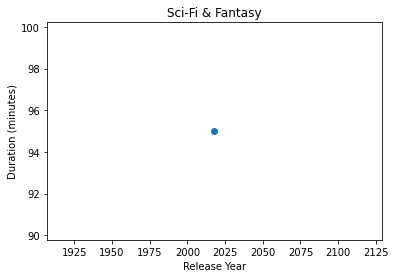

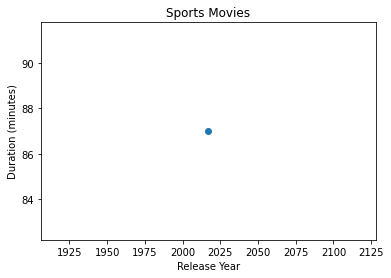

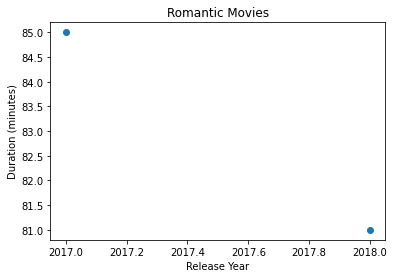

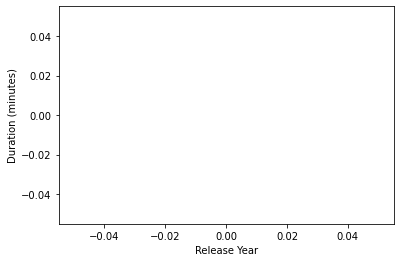

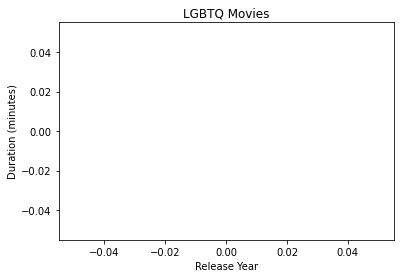

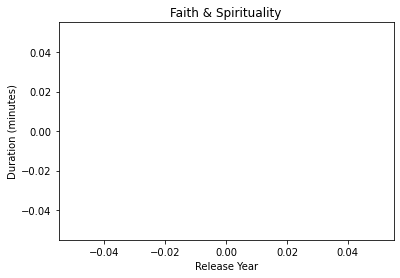

In [4]:
# Plot average duration per year for each genre on one graph
for i in unique_genres:
    durations = movies[movies.listed_in.isin([i])]
    genre_durations = durations.groupby('release_year').duration.mean().reset_index()
    plt.scatter(genre_durations.release_year, genre_durations.duration)
    plt.xlabel('Release Year')
    plt.ylabel('Duration (minutes)')
plt.title('All Genres')
plt.show()

# Plot average duration of all movies per year
plt.scatter(movie_durations.release_year, movie_durations.average_duration)
plt.title('All Movies')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.show()

# Plot average duration per year for each genre on seperate graph
for i in unique_genres:
    durations = movies[movies.listed_in.isin([i])]
    genre_durations = durations.groupby('release_year').duration.mean().reset_index()
    plt.scatter(genre_durations.release_year, genre_durations.duration)
    plt.title(i)
    plt.xlabel('Release Year')
    plt.ylabel('Duration (minutes)')
    plt.show()
    plt.close('all')
